A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels as sm
import pylab

In [2]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Hypothesis Testing/Assignment/Cutlets.csv')
dataset.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
# Dataset shape
dataset.shape

(51, 2)

In [4]:
# Checking for null values
dataset.isnull().sum()

Unit A    16
Unit B    16
dtype: int64

There are 16 null values

In [5]:
dataset

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [6]:
# Removing the null rows from the dataset
dataset = dataset.drop(index=range(35,51))

In [7]:
dataset.shape

(35, 2)

In [8]:
# Checking for descriptive statistics
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit A,35.0,7.019091,0.288408,6.4376,6.8315,6.9438,7.28055,7.5169
Unit B,35.0,6.964297,0.343401,6.0380,6.7536,6.9399,7.19500,7.5459


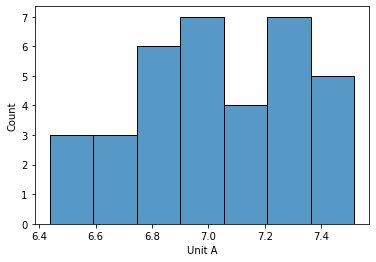

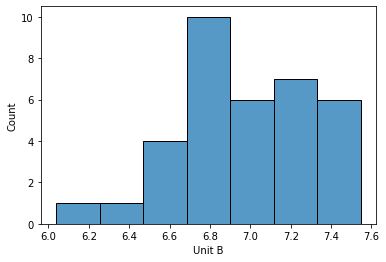

In [9]:
# checking for normal distribution
sns.histplot(dataset['Unit A']); plt.show()
sns.histplot(dataset['Unit B']); plt.show()

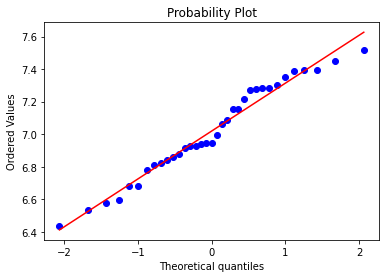

In [10]:
# Q-Q plot for Unit A
scipy.stats.probplot(dataset['Unit A'], dist="norm", plot=pylab)
plt.show()

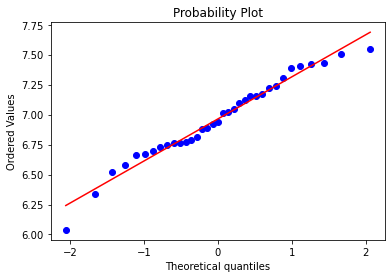

In [11]:
# Q-Q plot for Unit B
scipy.stats.probplot(dataset['Unit B'], dist="norm", plot=pylab)
plt.show()

<AxesSubplot:>

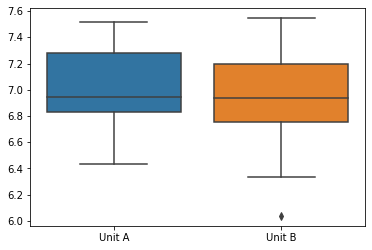

In [12]:
# Boxplot to identify outliers
sns.boxplot(data=dataset)

Unit B has outliers.

In [13]:
# Oultier Treatment

IQR = dataset['Unit B'].quantile(0.75) - dataset['Unit B'].quantile(0.25) # Calculating IQR range
low_end = dataset['Unit B'].quantile(0.25) - (1.5*IQR)               # Calculating lower whisker value
upper_end = dataset['Unit B'].quantile(0.75) + (1.5*IQR)             # Calculating upper whisker value
dataset['Unit B'] = pd.DataFrame(np.where(dataset['Unit B'] > upper_end,upper_end, 
                      np.where(dataset['Unit B'] < low_end,low_end,dataset['Unit B'])))

In [14]:
# Normality tests
print(scipy.stats.shapiro(dataset['Unit A']))  
print(scipy.stats.shapiro(dataset['Unit B']))

ShapiroResult(statistic=0.9649458527565002, pvalue=0.3199819028377533)
ShapiroResult(statistic=0.9754059314727783, pvalue=0.6071960926055908)


H0 ---> Data is normal 
Ha ---> Data is not normal

p-value is greater than 0.05, hence null hypothesis is accepted.

Data is Normal. 

In [15]:
# Assuming the external Conditions are same for both the samples
# Paired T-Test
ttest, pval = scipy.stats.ttest_rel(dataset['Unit A'], dataset['Unit B'])
print(pval)

0.4657376100831597


H0 ---> Both the samples are same
Ha ---> Both the samples are different

The p-value for the t-test is greater than the significance value of 0.05

Hence, we accept the null hypothesis

Both the samples are same.